<a href="https://colab.research.google.com/github/Imrgit93/UNS_Netflix-Movies-and-TV-Show-Clustering/blob/main/UNS_Netflix_Movies_and_TV_Show_Clustering_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Continuation after part 1

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import SpectralClustering
import scipy.cluster.hierarchy as sch  # Using the dendogram to find the optimal number of clusters
# Fitting hierarchical clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nmt4 = pd.read_csv('/content/drive/MyDrive/Alma Better/Capstone _Project/4 - UNS_Netflix Movies and TV Show Clustering./Lematized_file .csv')

In [ ]:
nmt4.head()

,Unnamed: 0,title,Final_mgs,tokenized_message,lemmat_message
0,0,3%,"['TVShow', 'JoãoMiguel', 'BiancaComparato', 'M...",TVShow JoãoMiguel BiancaComparato MichelGomes ...,TVShow JoãoMiguel BiancaComparato MichelGomes ...
1,1,7:19,"['Movie', 'DemiánBichir', 'HéctorBonilla', 'Os...",Movie DemiánBichir HéctorBonilla OscarSerrano ...,Movie DemiánBichir HéctorBonilla OscarSerrano ...
2,2,23:59,"['Movie', 'TeddChan', 'StellaChung', 'HenleyHi...",Movie TeddChan StellaChung HenleyHii LawrenceK...,Movie TeddChan StellaChung HenleyHii LawrenceK...
3,3,9,"['Movie', 'ElijahWood', 'JohnC.Reilly', 'Jenni...",Movie ElijahWood JohnC.Reilly JenniferConnelly...,Movie ElijahWood JohnC.Reilly JenniferConnelly...
4,4,21,"['Movie', 'JimSturgess', 'KevinSpacey', 'KateB...",Movie JimSturgess KevinSpacey KateBosworth Aar...,Movie JimSturgess KevinSpacey KateBosworth Aar...


In [ ]:
nmt4.columns

Index(['Unnamed: 0', 'title', 'Final_mgs', 'tokenized_message',
       'lemmat_message'],
      dtype='object')

In [ ]:
nmt4 = nmt4.drop(['Unnamed: 0','Final_mgs', 'tokenized_message'], axis=1)

In [ ]:
#Vectorization for tokenized_message
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(max_features = 20000)
X = vectorizer.fit_transform(nmt4['lemmat_message'])
f_mames = vectorizer.get_feature_names()
matrix = X.todense()
list_n =matrix.tolist()
df_v1 = pd.DataFrame(list_n,columns = f_mames)

In [ ]:
df_v1.iloc[:3,19800:20000]

,zhangzhenhuan,zhangzixian,zhangziyi,zhaobenshan,zhaojinmai,zhaojun,zhaolixin,zhaolusi,zhaoshunran,zhaowei,...,şahinirmak,şebnembozoklu,şenaygürler,şenolsönmez,şeref,şerifsezer,şinasiyurtsever,şiten,şler,şükranovalı
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Above is the sparce matrix so to do PCA we make it in array form.
X1 = X.toarray()

##PCA for dimension reduction

In [ ]:
# using PCA to reduce dimensionality
from sklearn.decomposition import PCA
pca = PCA(random_state=40)
pca.fit(X1)

PCA(random_state=40)

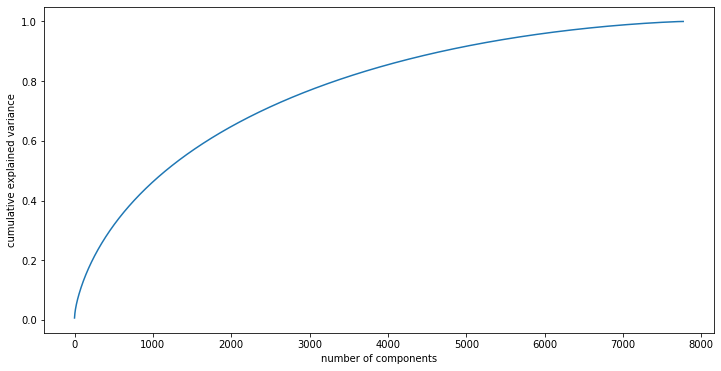

In [ ]:
# Lets plot explained var v/s comp to check how many components to be considered.
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
# reducing the dimensions to 5000 using pca
pca = PCA(n_components=5000,random_state=40)
pca.fit(X1)

PCA(n_components=5000, random_state=40)

In [ ]:
X_transformed = pca.transform(X1)
X_transformed.shape

(7770, 5000)

## Model 1 K Means clustering

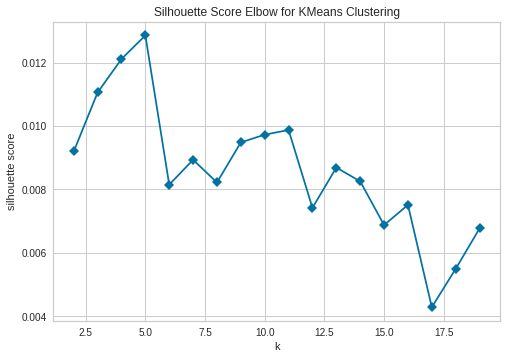

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=5)
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False, locate_elbow=False)

visualizer.fit(X_transformed)
visualizer.show()

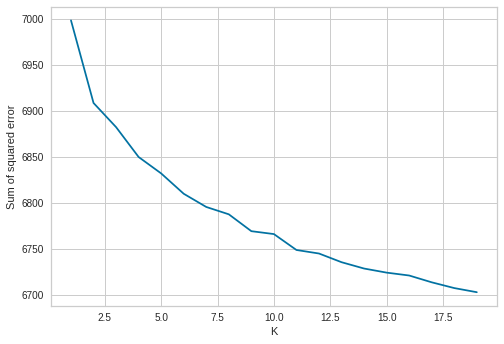

In [ ]:
score_1 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_transformed)
    score_1.append(kmeans.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(range_values,score_1)    

For n_clusters = 4, silhouette score is 0.012115116716703456


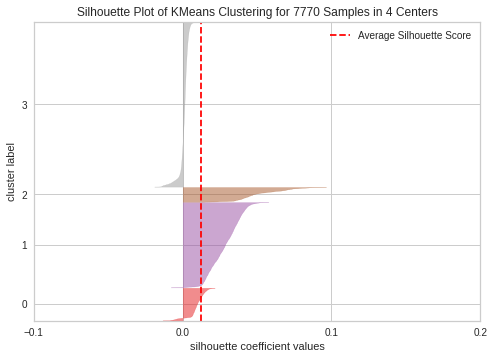

For n_clusters = 5, silhouette score is 0.012859885486475252


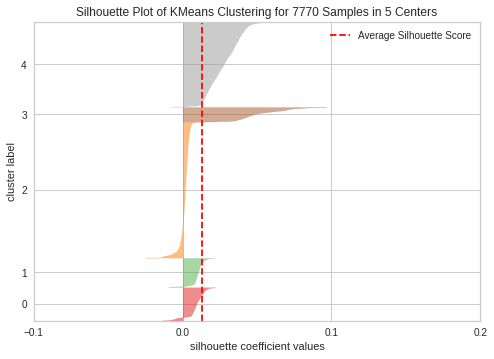

For n_clusters = 6, silhouette score is 0.008150979538425158


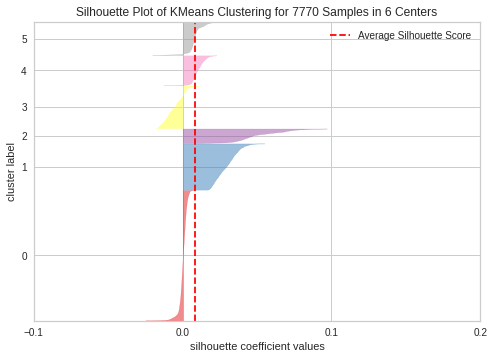

For n_clusters = 7, silhouette score is 0.008935620265311695


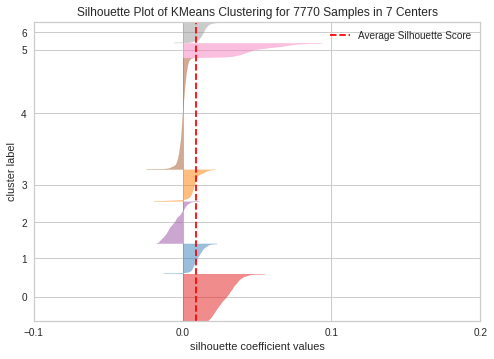

For n_clusters = 8, silhouette score is 0.008220855647708917


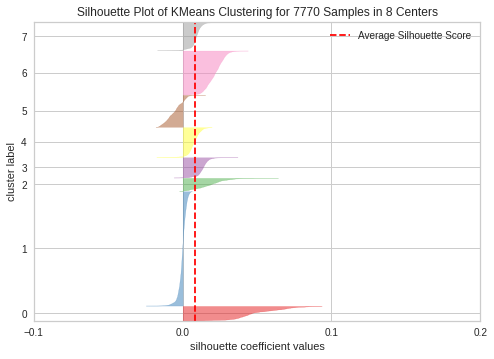

For n_clusters = 9, silhouette score is 0.00948481277015947


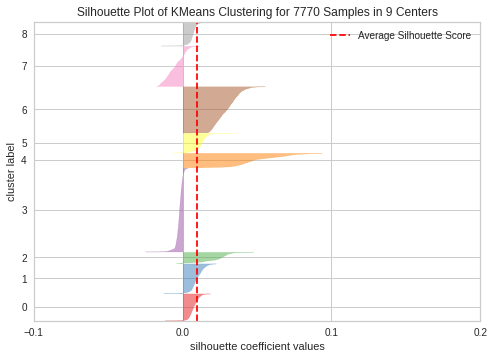

For n_clusters = 10, silhouette score is 0.009729074996672369


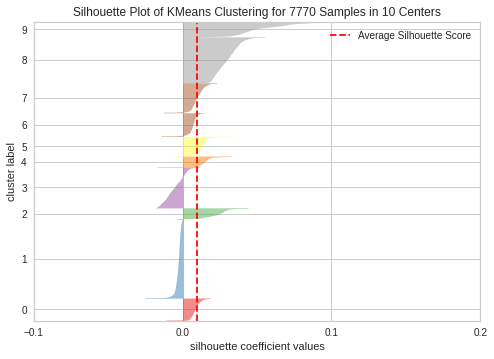

For n_clusters = 11, silhouette score is 0.009875010347052389


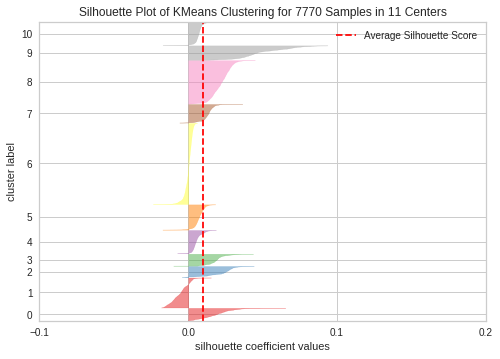

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples 

for n_clusters in range(4,12):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(X_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(X_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X_transformed) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data

#2.Hierarchical clustering:

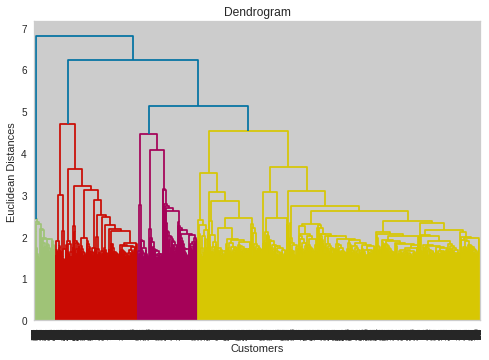

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_transformed, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering 
cluster = AgglomerativeClustering(n_clusters = 4,affinity = 'euclidean',linkage = 'ward')
X_pred = cluster.fit_predict(X_transformed)

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X_transformed,X_pred)

0.002706615443678468

#DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [ ]:
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(X_transformed)
distances, indices = nbrs.kneighbors(X_transformed)

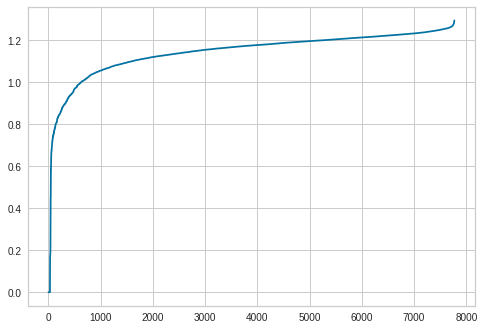

In [ ]:
#to find optimum eps
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
dbscancluster = DBSCAN(eps= 0.9, min_samples=5)
dbscancluster.fit(X_transformed)

DBSCAN(eps=0.9)

In [ ]:
clusters = dbscancluster.labels_

In [ ]:
len(set(clusters))

4

In [ ]:
silhouette_score(X_transformed,clusters)

-0.0044554362953429325

#Get Recommendations:

In [ ]:
#use of cosine similarity
from sklearn.metrics.pairwise  import cosine_similarity


In [ ]:
sim = cosine_similarity(X1)

In [ ]:
sim

array([[1.        , 0.        , 0.05225746, ..., 0.00581253, 0.02176717,
        0.00585529],
       [0.        , 1.        , 0.00894475, ..., 0.07281883, 0.        ,
        0.00242802],
       [0.05225746, 0.00894475, 1.        , ..., 0.00952243, 0.01611429,
        0.00274726],
       ...,
       [0.00581253, 0.07281883, 0.00952243, ..., 1.        , 0.00498186,
        0.158441  ],
       [0.02176717, 0.        , 0.01611429, ..., 0.00498186, 1.        ,
        0.03617686],
       [0.00585529, 0.00242802, 0.00274726, ..., 0.158441  , 0.03617686,
        1.        ]])

In [ ]:
sim.shape

(7770, 7770)

In [ ]:
sim[1]

array([0.        , 1.        , 0.00894475, ..., 0.07281883, 0.        ,
       0.00242802])

In [ ]:
nmt4[nmt4['title']== '9'].index[0]

3

In [ ]:
dist = sim[1]
dist

array([0.        , 1.        , 0.00894475, ..., 0.07281883, 0.        ,
       0.00242802])

In [ ]:
#defining a function such that it recommend 10 movies .
def recomend(movie):
  movie_index = nmt4[nmt4['title']== movie].index[0]
  dist = sim[movie_index]
  movie_list = sorted(list(enumerate(dist)),reverse = True,key = lambda x:x[1])[1:11]

  for i in movie_list:
    print(nmt4.iloc[i[0]].title)


In [ ]:
# Recomendation
recomend('9')

Cirque du Freak: The Vampire's Assistant
The River Wild
Real Steel
The Lord of the Rings: The Return of the King
Extinction
Small Soldiers
The Dark Crystal: Age of Resistance
The Book of Eli
Tremors 2: Aftershocks
The Imaginarium of Doctor Parnassus


**Conclusions:**

1)Majority of the content available on Netflix is Movies and amount of shows added on Netflix is growing exponentially.

2)United States and India are among the top 5 countries that produce majority of the available content on the platform. But United States took the NO.1 spot in both movie making and tv show.

3)Movie making directors are larger than TV Shows.

4)Also 6 of the actors among the top ten actors with maximum content are from India.

5)TV-MA tops the charts, indicating that mature content is more popular on Netflix.

6)Kmeans clustering was doing better than other models, k=11 was found to be an optimal value for clusters

7) Recommender system was created using cosine similarity and top 10 recommendations for Movies and Tv Shows were obtained